In [1]:
from lrgsglib.core import *
move_to_rootf()
#
izaro_mat_path = Path('data') / 'real_data' / 'brain' / '2165.mat'

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


In [2]:
# Load the MAT-file
data = loadmat(izaro_mat_path)
# Display keys in the MAT file
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'final_prob_connectome_cone'])


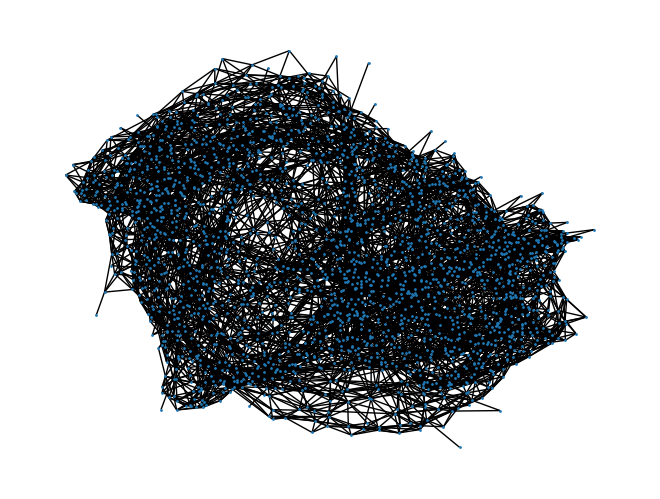

In [3]:
G = nx.from_numpy_array(data['final_prob_connectome_cone'])
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
G.number_of_nodes(), G.number_of_edges()
nx.draw(G, node_size=1)

In [4]:
S = entropy(G, steps=2000)

/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/src/lrgsglib/core.py:643: RuntimeWarning: divide by zero encountered in log
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)
/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/src/lrgsglib/core.py:643: RuntimeWarning: invalid value encountered in multiply
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)


In [5]:
Th= 0.05
w=1/nx.laplacian_spectrum(G)
tau=100
L=nx.laplacian_matrix(G)
L1=L.todense()
num=expm((-tau*L1))
den=np.trace(num)
rho=num/den
Trho=np.copy(1.0/rho)#1/adj2
Trho = np.maximum(Trho, Trho.transpose() )
np.fill_diagonal(Trho, 0)
dists = squareform(Trho)
linkage_matrix = linkage(dists, "average")
labelList = [i+1 for i in range(0, len(G.nodes()))]
tmax=linkage_matrix[::, 2][-1]#+0.01*linkage_matrix[::, 2][-1]
linkage_matrix = linkage(dists/tmax, "average")
CM=fcluster(linkage_matrix, t=Th, criterion='distance')
# Define the number of clusters
num_clusters = len(np.unique(CM))
# Generate a distinct colormap
cmap = plt.cm.get_cmap('tab10', num_clusters)  # 'tab10' ensures distinct colors
cmap1 = cmap(np.linspace(0, 1, num_clusters))  # Get unique colors
# Map clusters to colors
cluster_to_color = {cluster: cmap1[i] for i, cluster in enumerate(np.unique(CM))}

In [ ]:
pos = nx.spectral_layout(G)  # Use spectral embedding for node positions

# Assign colors to nodes based on module clustering
node_colors = [cluster_to_color[CM[i]] for i in range(len(G.nodes))]
edge_weights = np.array([G[u][v].get("weight", 1.0) for u, v in G.edges()])
edge_widths = 1 + 4 * (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min() + 1e-6)  # Normalize for better visibility

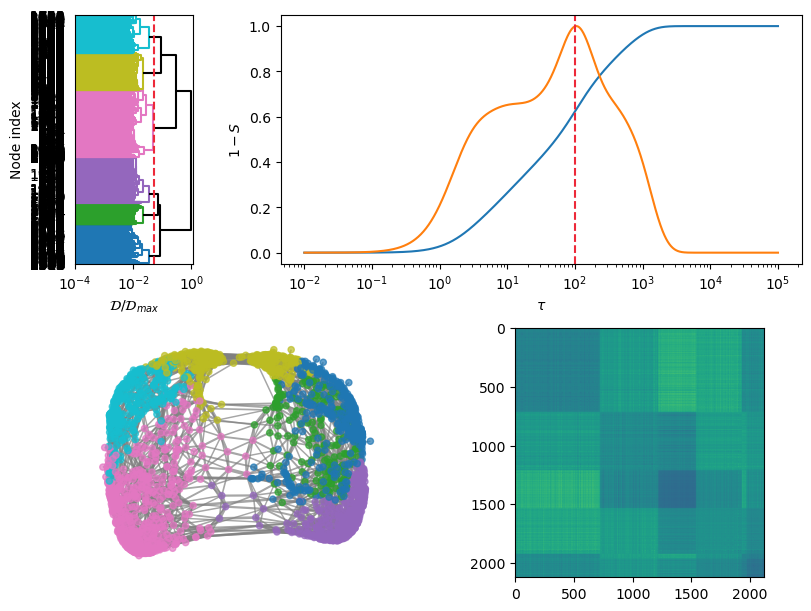

In [23]:
fig = plt.figure(constrained_layout=True,figsize=(8,6))
ax_dict = fig.subplot_mosaic(
    """
    ABBB
    CCDD
    """
)
#fig, ax = plt.subplots(1, 1, figsize=(4, 6))
dendrogram(linkage_matrix,labels=labelList,ax=ax_dict['A'],leaf_rotation=0,
           orientation='right',color_threshold=Th,above_threshold_color='k',
           leaf_font_size=10)

#cmap1[0]=[46/255., 159/255., 223/255., 1.]
hierarchy.set_link_color_palette([rgb2hex(rgb[:3]) for rgb in cmap1])
cont=0
ax_dict['A'].axvline(x = Th, color = '#ED2939', linestyle = '--')
ax_dict['A'].set_xscale('linear')
tmin=linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax=linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]
ax_dict['A'].set_xlim(tmin,tmax)
ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')
ax_dict['A'].set_xscale('log')
ax_dict['A'].set_xticks([1e-4,1e-2,1e0])

ax_dict['B'].plot(S[-1], S[0]/S[0].max())
ax_dict['B'].plot(S[-1][1:], S[1]/S[1].max())

ax_dict['B'].set_xscale('log')
ax_dict['B'].set_xlabel(r'$\tau$')
ax_dict['B'].set_ylabel(r'$1-S$')
ax_dict['B'].axvline(x = tau, color = '#ED2939', linestyle = '--')

ax_dict['D'].imshow(-np.log(rho))
nx.draw(G, pos, ax=ax_dict['C'], node_color=node_colors, with_labels=False, edge_color="gray", alpha=0.7, node_size=20, width=edge_widths)


fig.savefig(PATHPLOT / 'brain.pdf')

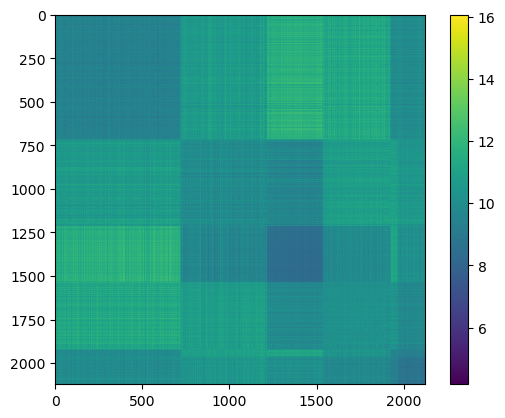

In [7]:
plt.imshow(-np.log(rho))
plt.colorbar()

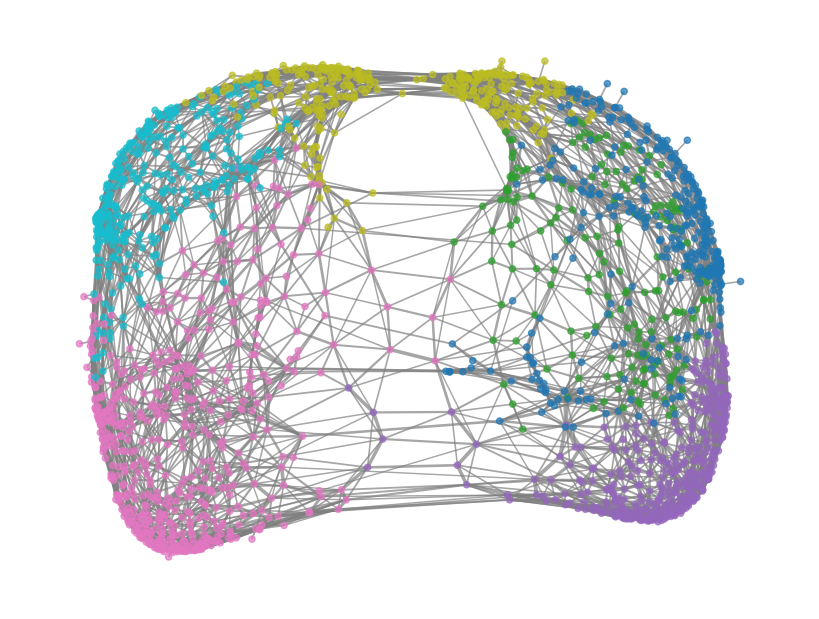

In [19]:
pos = nx.spectral_layout(G)  # Use spectral embedding for node positions

# Assign colors to nodes based on module clustering
node_colors = [cluster_to_color[CM[i]] for i in range(len(G.nodes))]
edge_weights = np.array([G[u][v].get("weight", 1.0) for u, v in G.edges()])
edge_widths = 1 + 4 * (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min() + 1e-6)  # Normalize for better visibility
# Draw graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=node_colors, with_labels=False, edge_color="gray", alpha=0.7, node_size=20, width=edge_widths)